<a href="https://colab.research.google.com/github/PolyGon-13/DataScience_Study/blob/main/Machine_Learing/02_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
df=pd.read_csv('./data/auto-mpg.csv',header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['horsepower']=df['horsepower'].replace('?',np.nan)
df['horsepower']=df['horsepower'].astype('float')
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())

ndf=df[['mpg','cylinders','horsepower','weight']]

X=ndf[['weight']]
y=ndf[['mpg']]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print('훈련 데이터 : ',X_train.shape) # 데이터셋의 크기, 특성의 개수
print('검증 데이터 : ',X_test.shape)

훈련 데이터 :  (278, 1)
검증 데이터 :  (120, 1)


In [298]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2) # 2차 다항회귀를 위한 변환기 생성
X_train_poly=poly.fit_transform(X_train) # 원본 데이터에 대해 2차 다항식 항을 추가해서 새로운 피처를 생성

print('원본 데이터 : ',X_train.shape)
print('2차항 변환 데이터 : ',X_train_poly.shape)

원본 데이터 :  (278, 1)
2차항 변환 데이터 :  (278, 3)


In [299]:
pr=LinearRegression() # 회귀모델 생성
pr.fit(X_train_poly,y_train) # 변형된 원본 데이터와 타켓 값을 사용하여 모델 학습 -> 이 과정에서 최소 제곱법을 통한 회귀계수를 계산하여 모델을 학습함

X_test_poly=poly.fit_transform(X_test) # 테스트 데이터도 2차 다항식 항을 추가해 변환
r_square=pr.score(X_test_poly,y_test) # 학습된 모델을 사용해 테스트 데이터의 결정계수 계산
print('R^2 결정계수 : ',r_square)

R^2 결정계수 :  0.7255470154175803


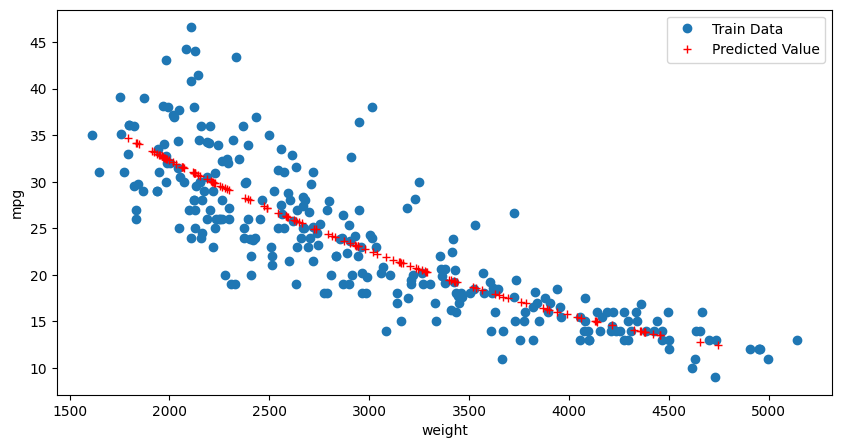

In [300]:
y_hat_test=pr.predict(X_test_poly)

fig,axes=plt.subplots(figsize=(10,5))
axes.plot(X_train,y_train,'o',label='Train Data')
axes.plot(X_test,y_hat_test,'r+',label='Predicted Value')
axes.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

In [301]:
X_ploy=poly.fit_transform(X_test)

test_preds=pd.DataFrame(y_test)
test_preds.columns=['y_test']
test_preds['y_hat']=y_hat_test
test_preds['squared_error']=(test_preds['y_hat']-test_preds['y_test'])**2

mse=test_preds['squared_error'].mean()
print('mse : ',mse)

mse :  15.813520500520452


In [302]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_hat_test)
print('mse : ',mse)

mse :  15.813520500520452


In [303]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(y_test,y_hat_test)
print('mae : ',mae)

mae :  3.140565073446064


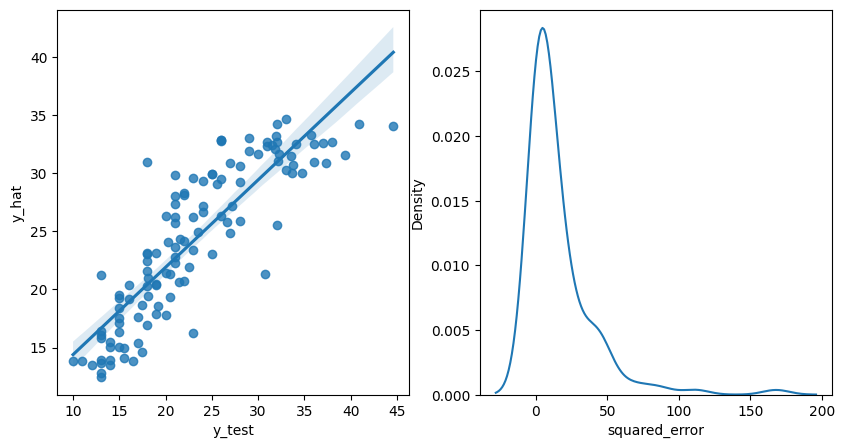

In [304]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.regplot(x='y_test',y='y_hat',data=test_preds,ax=axes[0]);
sns.kdeplot(x='squared_error',data=test_preds,ax=axes[1]);